# Experimenting Optimize and Save Models

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Memuat himpunan data
url = 'https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv'
bike_data = pd.read_csv(url)
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']
bike_data[numeric_features + ['rentals']].describe()
print(bike_data.head())

   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0        2           1   
4        5  1/5/2011       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  rentals  day  
0           2  0.344167  0.363625  0.805833   0.160446      331    1  
1           2  0.363478  0.353739  0.696087   0.248539      131    2  
2           1  0.196364  0.189405  0.437273   0.248309      120    3  
3           1  0.200000  0.212122  0.590435   0.160296      108    4  
4           1  0.226957  0.229270  0.436957   0.186900       82    5  


In [9]:
# Memisahkan fitur dan label
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

# Memisahkan data 70%-30% menjadi set pelatihan dan uji set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print('Training Set: %d rows\nTest Set: %d rows' %(X_train.shape[0], X_test.shape[0]))


Training Set: 511 rows
Test Set: 220 rows


GradientBoostingRegressor() 

MSE 104084.912759153
RMSE 322.6219347148501
R2 0.7959480612839523


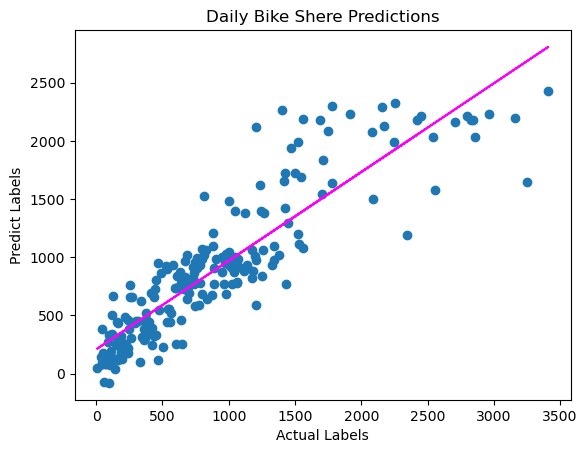

In [12]:
# Melatih model
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# Manyesuaikan model lasso pada set pelatihann
model = GradientBoostingRegressor().fit(X_train, y_train)
print(model, '\n')

# Evaluasi model menggunakan data pengujian
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print('MSE', mse)
rmse = np.sqrt(mse)
print('RMSE', rmse)
r2 = r2_score(y_test, predictions)
print('R2', r2)

# Plot diprediksi vs aktual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predict Labels')
plt.title('Daily Bike Shere Predictions')

# Garis Overlay regresi linear
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()

#### Optimize Hyperparameters

Best Parameter combination: {'learning_rate': 0.1, 'n_estimators': 100} 

GradientBoostingRegressor() 

MSE:  103926.27802852941
RMSE:  322.37598860419087
R2:  0.7962590547168463


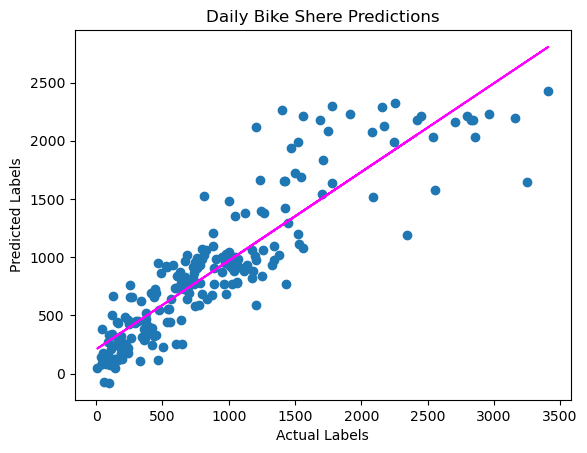

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

#
alg = GradientBoostingRegressor()

#
params = {
    'learning_rate' : [0.1, 0.5, 1.0],
    'n_estimators' : [50, 100, 150]
}

# 
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print('Best Parameter combination:', gridsearch.best_params_, '\n')

# 
model = gridsearch.best_estimator_
print(model, '\n')

# 
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print('MSE: ', mse)
rmse = np.sqrt(mse)
print('RMSE: ', rmse)
r2 = r2_score(y_test, predictions)
print('R2: ', r2)

#
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Shere Predictions')

#
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()

#### Data Processing

MSE: 105579.06460427822
RMSE: 324.9293224753319
R2: 0.7930188703699969


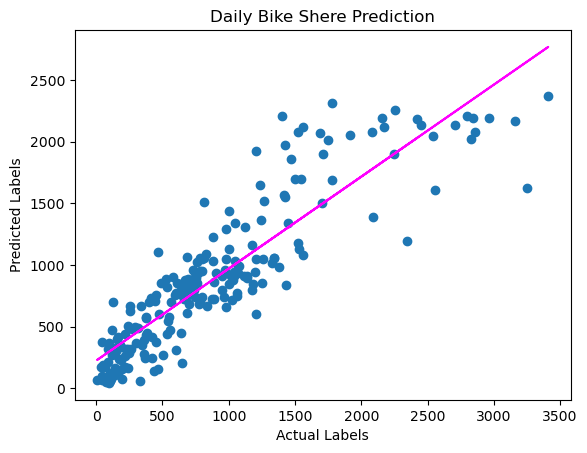

In [14]:
# Melatih model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# Menentukan prapemrosesan untuk kolom numerik (yang diskalakan)
numeric_features = [6, 7, 8, 9]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Menentukan prapemrosesan untuk fitur kategoris (encoder)
categorical_features = [0, 1, 2, 3, 4, 5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Menggabungkan langkah-langkah prapemrosesan
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Membuat alur prapemrosessan dan pelatihan 
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])

# Sesuaikan pipa untuk melatih model regresi linear pada set pelatihan
model = pipeline.fit(X_train, (y_train))
model

# Mencari Prediksi dari data
predictions = model.predict(X_test)

# Menampilkan jumlah Metrik data
mse = mean_squared_error(y_test, predictions)
print('MSE:', mse)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
r2 = r2_score(y_test, predictions)
print('R2:', r2)

# Menampilkan plot prediksi dan aktual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Shere Prediction')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()

#### Used Train Model

In [15]:
import joblib

# Menyimpan file menjadi file acak
filename = './bike-shere.pkl'
joblib.dump(model, filename)

#
loaded_model = joblib.load(filename)

# 
X_new = np.array([[1, 1, 0, 3, 1, 1, 0.226957, 0.22927, 0.436957, 0.1896]]).astype('float64')
print('New sample: {}'.format(list(X_new[0])))

#
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))

#
X_new = np.array([[0,1,1,0,0,1,0.344167,0.363625,0.805833,0.160446],
                  [0,1,0,1,0,1,0.363478,0.353739,0.696087,0.248539],
                  [0,1,0,2,0,1,0.196364,0.189405,0.437273,0.248309],
                  [0,1,0,3,0,1,0.2,0.212122,0.590435,0.160296],
                  [0,1,0,4,0,1,0.226957,0.22927,0.436957,0.1869]])

#
result = loaded_model.predict(X_new)
print('5-day rental predictions:')
for prediction in result:
    print(np.round(prediction))

New sample: [1.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, 0.22927, 0.436957, 0.1896]
Prediction: 122 rentals
5-day rental predictions:
493.0
929.0
428.0
471.0
491.0


## Summary

- kode tersebut berkaitan dengan pembuatan model regresi untuk memprediksi jumlah sewa sepeda dalam sehari berdasarkan berbagai fitur seperti musim, bulan, suhu, kelembaban, dll. 
- Kode tersebut memuat data, memproses data, membagi data menjadi set pelatihan dan pengujian, dan melatih model Regresi Gradient Boosting pada data pelatihan. Selanjutnya, model dievaluasi pada data pengujian menggunakan metrik kesalahan kuadrat rata-rata, akar kesalahan kuadrat rata-rata, dan R-kuadrat. Maka, kode melakukan penyetelan hiperparameter menggunakan Grid Search CV dan membangun pipeline untuk memproses data dan melatih model. Model dievaluasi pada data pengujian dan metrik seperti MSE, RMSE, dan R-kuadrat dihitung. Kode juga membuat plot nilai prediksi vs. nilai aktual.